In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import scipy.stats as stats 
from datetime import datetime

cl_data = pd.read_csv('cleanData.csv')

cl_data.dropna(inplace=True)
cl_data.info()
cl_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 391580 entries, 0 to 391807
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   DR_NO         391580 non-null  int64  
 1   Date Rptd     391580 non-null  object 
 2   TIME OCC      391580 non-null  int64  
 3   AREA          391580 non-null  int64  
 4   AREA NAME     391580 non-null  object 
 5   Rpt Dist No   391580 non-null  int64  
 6   Part 1-2      391580 non-null  int64  
 7   Crm Cd        391580 non-null  int64  
 8   Crm Cd Desc   391580 non-null  object 
 9   Vict Age      391580 non-null  int64  
 10  Vict Sex      391580 non-null  int64  
 11  Vict Descent  391580 non-null  int64  
 12  Premis Cd     391580 non-null  float64
 13  Premis Desc   391580 non-null  object 
 14  Status        391580 non-null  int64  
 15  Status Desc   391580 non-null  object 
 16  Crm Cd 1      391580 non-null  float64
 17  LOCATION      391580 non-null  object 
 18  LAT      

,DR_NO,Date Rptd,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,...,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,DATE OCC,Year,Month
0,200320258,2020-11-11,1700,3,Southwest,356,1,480,BIKE - STOLEN,19,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",1,Invest Cont,480.0,1400 W 37TH ST,34.0210,-118.3002,2020-11-11,2020,11
1,220614831,2022-08-18,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,28,...,SIDEWALK,1,Invest Cont,354.0,1900 TRANSIENT,34.0944,-118.3277,2022-08-18,2022,8
2,220314085,2022-07-22,1110,3,Southwest,303,2,354,THEFT OF IDENTITY,27,...,CELL PHONE STORE,1,Invest Cont,354.0,2500 S SYCAMORE AV,34.0335,-118.3537,2022-07-22,2022,7
3,230312288,2023-06-01,315,3,Southwest,391,2,354,THEFT OF IDENTITY,56,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",1,Invest Cont,354.0,4200 SANTO TOMAS DR,34.0103,-118.3456,2023-06-01,2023,6
4,231322474,2023-12-24,1200,13,Newton,1354,2,354,THEFT OF IDENTITY,23,...,SINGLE FAMILY DWELLING,1,Invest Cont,354.0,4000 WALL ST,34.0112,-118.2716,2023-12-24,2023,12


In [7]:

print(cl_data["Year"].nunique())

cl_data.drop(["DR_NO","Date Rptd","AREA NAME","Crm Cd Desc","Premis Desc","Status Desc","LOCATION", "Crm Cd 1",  "LAT", "LON"], axis=1, inplace=True)

5


In [9]:
#trainer_set =  cl_data["TIME OCC",	"AREA","Rpt Dist No",	"Part 1-2",	"Crm Cd",	"Vict Age","Vict Sex" , "Vict Descen",  "Premis Cd",	"Status", " DATE OCC",	"Year",	"Month"]]

trainer_set = cl_data[:]
test_set = cl_data[:]

trainer_set.drop(trainer_set[trainer_set["Year"] > 2023].index, inplace=True)
test_set = test_set[test_set["Year"] == 2024]

print(trainer_set["Year"].nunique())
print(pd.unique(pd.Series(trainer_set["Year"]) ))

print(test_set["Year"].nunique())
print(pd.unique(pd.Series(test_set["Year"]) ))



4
[2020 2022 2023 2021]
1
[2024]


C:\Users\juanc\AppData\Local\Temp\ipykernel_22476\1493425032.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainer_set.drop(trainer_set[trainer_set["Year"] > 2023].index, inplace=True)


# Second point

In [10]:
data_first_regression = pd.DataFrame({"Dates": trainer_set["DATE OCC"]})

data_first_regression["Dates"] = [ date[:7] for date in data_first_regression["Dates"] ]
data_first_regression["Dates"] =  pd.to_datetime(data_first_regression["Dates"], format ="%Y-%m")


count_by_date = data_first_regression.groupby(by = ["Dates"]).size()


dates = pd.to_datetime(count_by_date.index, format ="%Y-%m")
# print(count_by_date)
# print(dates)

#Test
data_first_regression_test = pd.DataFrame({"Dates": test_set["DATE OCC"]})

data_first_regression_test["Dates"] = [ date[:7] for date in data_first_regression_test["Dates"] ]
data_first_regression_test["Dates"] =  pd.to_datetime(data_first_regression_test["Dates"], format ="%Y-%m")


count_by_date_test = data_first_regression_test.groupby(by = ["Dates"]).size()
dates_test = pd.to_datetime(count_by_date_test.index, format ="%Y-%m")
# print(count_by_date_test)
# print(dates_test)

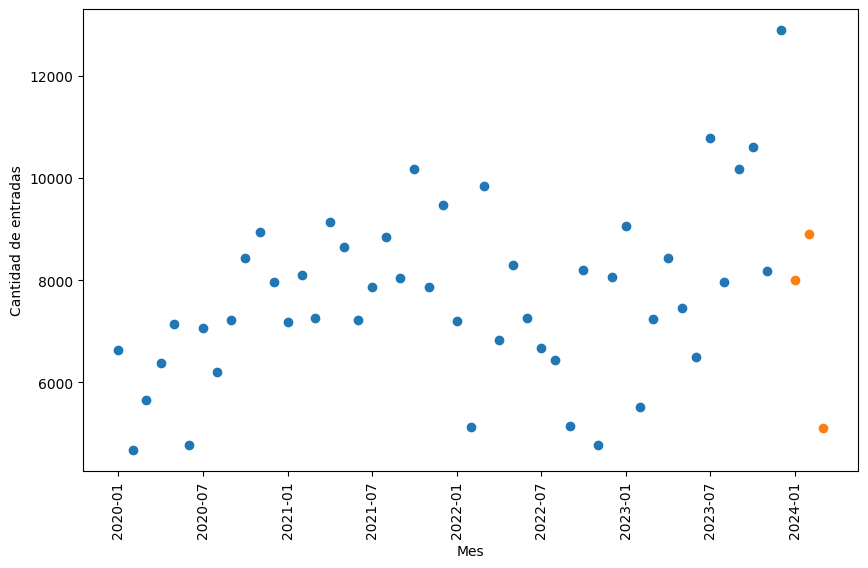

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(dates, count_by_date.values)
plt.scatter(dates_test, count_by_date_test.values)
plt.xlabel('Mes')
plt.ylabel('Cantidad de entradas')


plt.xticks(rotation=90)  
plt.show()



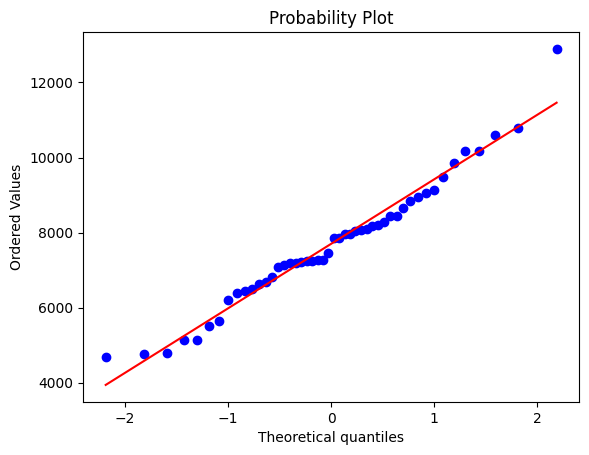

In [12]:

# Comprobación de distribución normal mediante Quantile-Quantile
plt.figure()
stats.probplot(count_by_date, dist= "norm", plot= pylab)
plt.show()

In [13]:
# Normalizar los datos

data_norm, lambda_used = stats.boxcox(count_by_date)

data_norm = pd.DataFrame(data_norm)


data_norm_test, lambda_used_test = stats.boxcox(count_by_date_test)

data_norm_test = pd.DataFrame(data_norm_test)

In [14]:
print(data_norm)

            0
0   55.194563
1   48.687923
2   52.099194
3   54.409919
4   56.656640
5   49.040925
6   56.446766
7   53.871844
8   56.893140
9   60.124645
10  61.387993
11  58.880971
12  56.792007
13  59.244621
14  56.979960
15  61.830568
16  60.641852
17  56.904357
18  58.619400
19  61.141162
20  59.116902
21  64.262800
22  58.640617
23  62.632822
24  56.814510
25  50.337924
26  63.501036
27  55.744275
28  59.750444
29  57.007915
30  55.289351
31  54.595178
32  50.366052
33  59.501113
34  49.059375
35  59.145619
36  61.661976
37  51.646584
38  56.943582
39  60.114520
40  57.539772
41  54.764233
42  65.574481
43  58.917787
44  64.231489
45  65.208772
46  59.446877
47  69.860473


In [15]:
print(data_norm_test)

              0
0  2.223455e+10
1  2.987039e+10
2  6.402425e+09


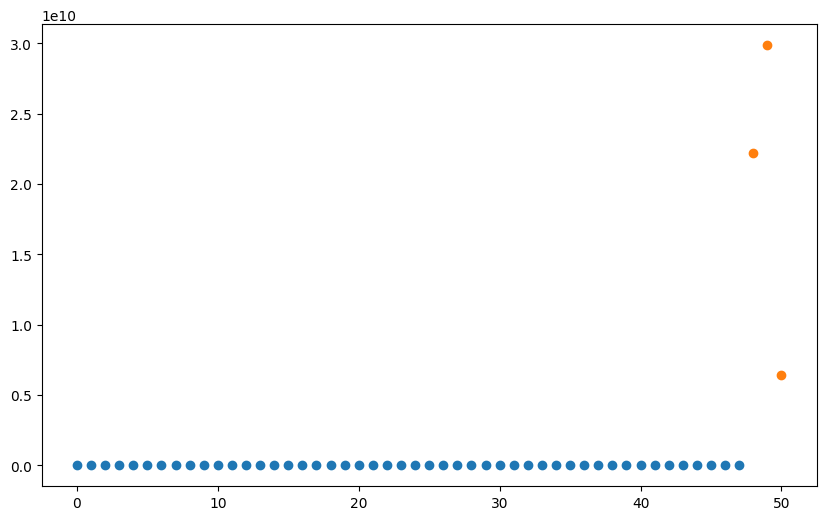

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(data_norm.index, data_norm.values)
plt.scatter([48, 49,50], data_norm_test.values)
plt.xticks() 
plt.show()


In [17]:

from sklearn import linear_model

count_by_date_regression = pd.Series(count_by_date.values, index=count_by_date.index)
x = pd.to_datetime(count_by_date_regression.index).astype('int64').values.reshape(-1, 1).astype('int32')

model = linear_model.LinearRegression()

model.fit(x, count_by_date_regression.values)



LinearRegression()

In [18]:
print("Intercept:", model.intercept_)
print("Coeficiente:", list(zip(data_norm, model.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", model.score(data_norm, data_norm.values))

Intercept: 7710.116218653108
Coeficiente: [(0, -1.1432168424863513e-07)]
Coeficiente de determinación R^2: -2860841.0446329317


In [19]:
from sklearn.metrics import mean_squared_error
#prediccion

count_by_date_regression_test = pd.Series(count_by_date_test.values, index=count_by_date_test.index)
x_test = pd.to_datetime(count_by_date_regression_test.index).astype('int64').values.reshape(-1, 1).astype('int32')

predictions_no_test = model.predict(x)
predictions = model.predict(x_test)

rmse = mean_squared_error(
        y_true  = count_by_date.values,
        y_pred  = predictions_no_test,
        squared=False
       )

print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 1676.6988401163946


C:\Users\juanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


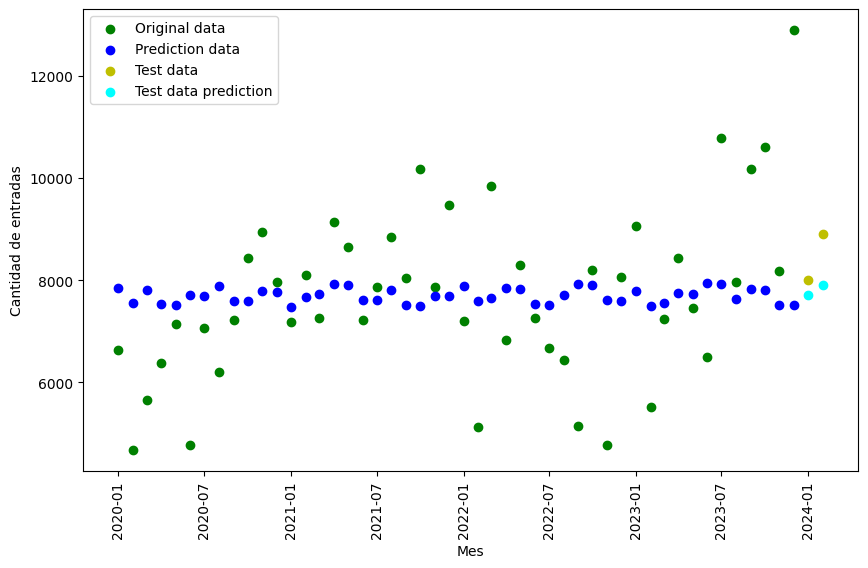

In [20]:

plt.figure(figsize=(10, 6))
plt.scatter(dates, count_by_date.values, c= "g" , label = "Original data")
plt.scatter(dates, predictions_no_test, c= "b", label = "Prediction data")
plt.scatter(dates_test[0:2], count_by_date_test.values[0:2], c= "y", label = "Test data")
plt.scatter(dates_test[0:2], predictions[0:2], c= "cyan", label = "Test data prediction")
plt.xlabel('Mes')
plt.ylabel('Cantidad de entradas')
plt.legend()

plt.xticks(rotation=90)  
plt.show()

# Third point

First aproach working without age = 0

C:\Users\juanc\AppData\Local\Temp\ipykernel_22476\2248593428.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainer_set2.drop(["DATE OCC"], axis=1, inplace=True)


              TIME OCC      AREA  Rpt Dist No  Part 1-2    Crm Cd  Vict Age  \
TIME OCC      1.000000  0.003035     0.003076 -0.045187  0.012258 -0.034057   
AREA          0.003035  1.000000     0.999050  0.009065 -0.000212  0.018242   
Rpt Dist No   0.003076  0.999050     1.000000  0.008915 -0.000285  0.018120   
Part 1-2     -0.045187  0.009065     0.008915  1.000000  0.712221  0.198494   
Crm Cd        0.012258 -0.000212    -0.000285  0.712221  1.000000 -0.011068   
Vict Age     -0.034057  0.018242     0.018120  0.198494 -0.011068  1.000000   
Vict Sex     -0.029726 -0.042487    -0.042407  0.162608  0.095346 -0.123690   
Vict Descent -0.020823 -0.031465    -0.031656  0.021090 -0.042328  0.046127   
Premis Cd    -0.054211 -0.003611    -0.003707  0.262100  0.110948  0.185812   
Status       -0.001339  0.024655     0.024415  0.134645  0.095573  0.033323   
Year         -0.007781 -0.012531    -0.012224 -0.011363 -0.017291 -0.030431   
Month         0.000993 -0.002690    -0.002651 -0.008

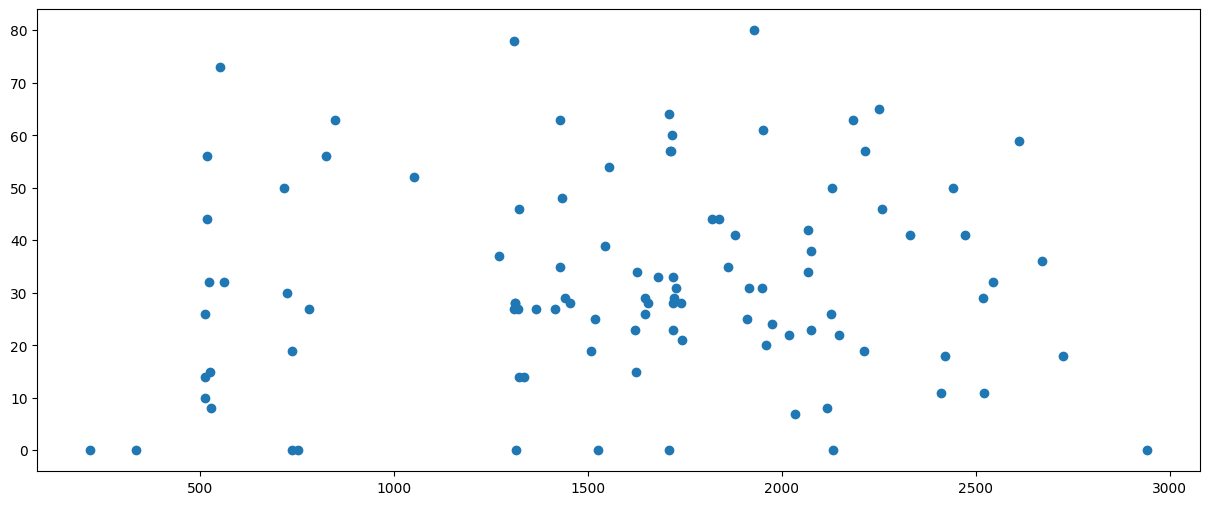

0      2213.0
1      1312.0
2      1368.0
3       826.0
4      1720.0
        ...  
96     1727.0
97     1508.0
98     2127.0
99     1928.0
100     513.0
Length: 101, dtype: float64


In [54]:
trainer_set2 = cl_data[:]


trainer_set2.drop(["DATE OCC"], axis=1, inplace=True)

print(trainer_set2.corr())



data_second_regression = pd.DataFrame({"Ages":trainer_set2["Vict Age"], "Part 1-2": trainer_set2["Part 1-2"], "Premis Cd": trainer_set2["Premis Cd"], "Genere": trainer_set2["Vict Sex"], "TIME OCC": trainer_set2["TIME OCC"] ,  "AREA": trainer_set2["AREA"],  "Vict Descent": trainer_set2["Vict Descent"]})

#count_by_age = data_second_regression.groupby(["Dates", "Ages"]).agg("count")
count_by_age = data_second_regression.groupby(["Ages"]).size()
print(count_by_age)
#print(count_by_age)
plt.figure(figsize=(15,6))
print(data_second_regression["Ages"][0:101])
plt.scatter(data_second_regression["Part 1-2"][0:101] + data_second_regression["Premis Cd"][0:101] + data_second_regression["Genere"][0:101] + data_second_regression["TIME OCC"][0:101] + data_second_regression["AREA"][0:101] + data_second_regression["Vict Descent"][0:101], data_second_regression["Ages"][0:101])
#plt.scatter(range(0, len(data_second_regression[0:101]) ), data_second_regression["Ages"][0:101])

plt.show()

data_to_work = data_second_regression["Part 1-2"][0:101] + data_second_regression["Premis Cd"][0:101] + data_second_regression["Genere"][0:101]  + data_second_regression["TIME OCC"][0:101] + data_second_regression["AREA"][0:101] + data_second_regression["Vict Descent"][0:101]
data_to_test = data_second_regression["Part 1-2"][100:151] + data_second_regression["Premis Cd"][100:151]  + data_second_regression["Genere"][100:151] + data_second_regression["TIME OCC"][100:151] + data_second_regression["AREA"][100:151] + data_second_regression["Vict Descent"][100:151]


In [ ]:
# Comprobación de distribución normal mediante Quantile-Quantile
# plt.figure()
# stats.probplot(data_to_work, dist= "norm", plot= pylab)
# plt.show()

In [55]:
# Comprobación de distribución normal mediante Shapiro-Wilks

stadistico, p_value = stats.shapiro(data_second_regression["Ages"][0:101])

print(stadistico, p_value)



0.9698144709324055 0.020411648405972194


since the pi value gotten by aplying Shapiro-Wilks is not bigger that 0.05 we know that the data hasn't a normal distribution

In [56]:
# Normalizar los datos
print(data_second_regression["Ages"][0:101])

data_norm, lambda_used = stats.yeojohnson(data_second_regression["Ages"][0:101])

data_norm = pd.DataFrame(data_norm)

print(data_norm)

# data_norm_test, lambda_used_test = stats.boxcox(count_by_date_test)

# data_norm_test = pd.DataFrame(data_norm_test)

0      19
1      28
2      27
3      56
4      23
       ..
96     31
97     19
98     26
99     80
100    14
Name: Ages, Length: 101, dtype: int64
             0
0    10.438187
1    14.022016
2    13.641612
3    23.546010
4    12.078610
..         ...
96   15.141257
97   10.438187
98   13.257268
99   30.633192
100   8.246032

[101 rows x 1 columns]


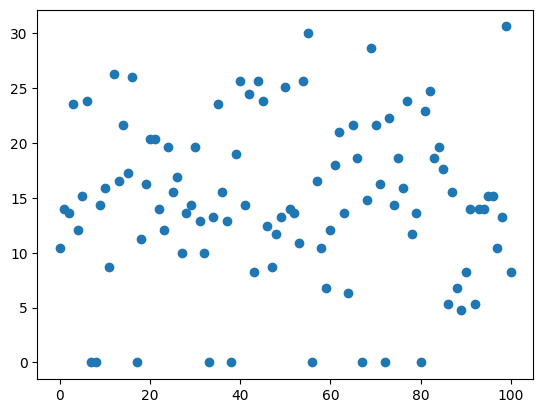

In [57]:
plt.scatter(data_norm.index, data_norm.values)

In [58]:
#count_by_age_regression = pd.Series(data_to_work, index=range(0, len(data_second_regression[0:101]))) 

count_by_age_regression = pd.Series(data_to_work) 

x = count_by_age_regression.values.reshape(-1, 1)
age_model = linear_model.LinearRegression()

age_model.fit(x, data_second_regression["Ages"][0:101])

LinearRegression()

In [59]:
count_by_age_regression_test = pd.Series(data_to_test)

x_test2 = count_by_age_regression_test.values.reshape(-1, 1)

prediction_age = age_model.predict(x_test2)

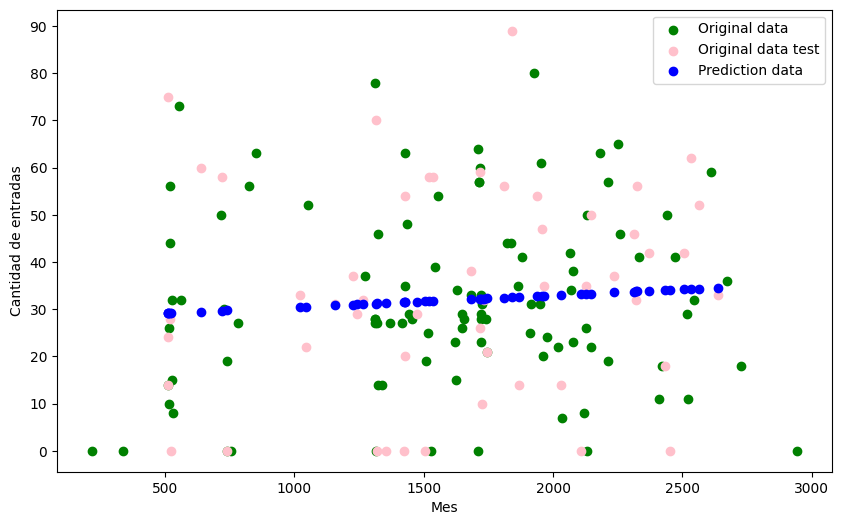

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(data_to_work, data_second_regression["Ages"][0:101], c= "g" , label = "Original data")
plt.scatter(data_to_test, data_second_regression["Ages"][100:151], c= "pink" , label = "Original data test")
plt.scatter(data_to_test, prediction_age, c= "b", label = "Prediction data")
# plt.scatter(dates_test[0:2], count_by_date_test.values[0:2], c= "y", label = "Test data")
# plt.scatter(dates_test[0:2], predictions[0:2], c= "cyan", label = "Test data prediction")
plt.xlabel('Mes')
plt.ylabel('Cantidad de entradas')
plt.yticks([0,10,20,30,40,50,60,70,80,90])
plt.legend()
 
plt.show()

In [61]:
from sklearn.metrics import  r2_score
rmse = mean_squared_error(
        y_true  = data_second_regression["Ages"][100:151],
        y_pred  = prediction_age,
        squared=False
       )
r2 = r2_score(data_second_regression["Ages"][100:151], prediction_age)
print(f"El error (rmse) de test es: {rmse}\nEl r2 es {r2}")

El error (rmse) de test es: 21.9711550939711
El r2 es 0.003344157014992022


C:\Users\juanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Conclusión no sirve regresión lineal 

In [62]:
trainer_set2.head(10)

,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Status,Year,Month
0,1700,3,356,1,480,19,3,4,502.0,1,2020,11
1,1200,6,666,2,354,28,1,1,102.0,1,2022,8
2,1110,3,303,2,354,27,2,3,248.0,1,2022,7
3,315,3,391,2,354,56,1,3,502.0,1,2023,6
4,1200,13,1354,2,354,23,1,3,501.0,1,2023,12
5,1800,7,776,1,230,31,2,5,101.0,3,2020,11
6,1200,7,747,1,341,57,2,3,501.0,1,2022,2
7,630,4,413,1,510,0,1,1,101.0,1,2020,9
8,1300,21,2113,2,668,0,1,1,203.0,1,2022,2
9,2000,12,1259,2,930,29,2,1,502.0,2,2021,9


In [66]:



invented_data = [
    [1, 248.0, 1,1200, 8, 1],
    [2, 101.0, 2,200, 5, 2],
    [1, 203.0, 3,1800,19, 3],
    [2, 502.0, 3,300,21, 4],
    [1, 502.0, 2,1110,1, 5]
]

invented_data_sum = [sum(dat) for dat in invented_data]

print(invented_data_sum)

[1459.0, 312.0, 2029.0, 832.0, 1621.0]


In [70]:
invented_data_sum_serie = pd.Series(invented_data_sum)

x_final = invented_data_sum_serie.values.reshape(-1, 1)
final_prediction = age_model.predict(x_final)

print(final_prediction)

[31.55005508 28.62930545 33.00151741 29.95344652 31.96257596]


# Fourth point

C:\Users\juanc\AppData\Local\Temp\ipykernel_22476\3160764930.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainer_set3.drop(["DATE OCC"], axis=1, inplace=True)


              TIME OCC      AREA  Rpt Dist No  Part 1-2    Crm Cd  Vict Age  \
TIME OCC      1.000000  0.003035     0.003076 -0.045187  0.012258 -0.034057   
AREA          0.003035  1.000000     0.999050  0.009065 -0.000212  0.018242   
Rpt Dist No   0.003076  0.999050     1.000000  0.008915 -0.000285  0.018120   
Part 1-2     -0.045187  0.009065     0.008915  1.000000  0.712221  0.198494   
Crm Cd        0.012258 -0.000212    -0.000285  0.712221  1.000000 -0.011068   
Vict Age     -0.034057  0.018242     0.018120  0.198494 -0.011068  1.000000   
Vict Sex     -0.029726 -0.042487    -0.042407  0.162608  0.095346 -0.123690   
Vict Descent -0.020823 -0.031465    -0.031656  0.021090 -0.042328  0.046127   
Premis Cd    -0.054211 -0.003611    -0.003707  0.262100  0.110948  0.185812   
Status       -0.001339  0.024655     0.024415  0.134645  0.095573  0.033323   
Year         -0.007781 -0.012531    -0.012224 -0.011363 -0.017291 -0.030431   
Month         0.000993 -0.002690    -0.002651 -0.008

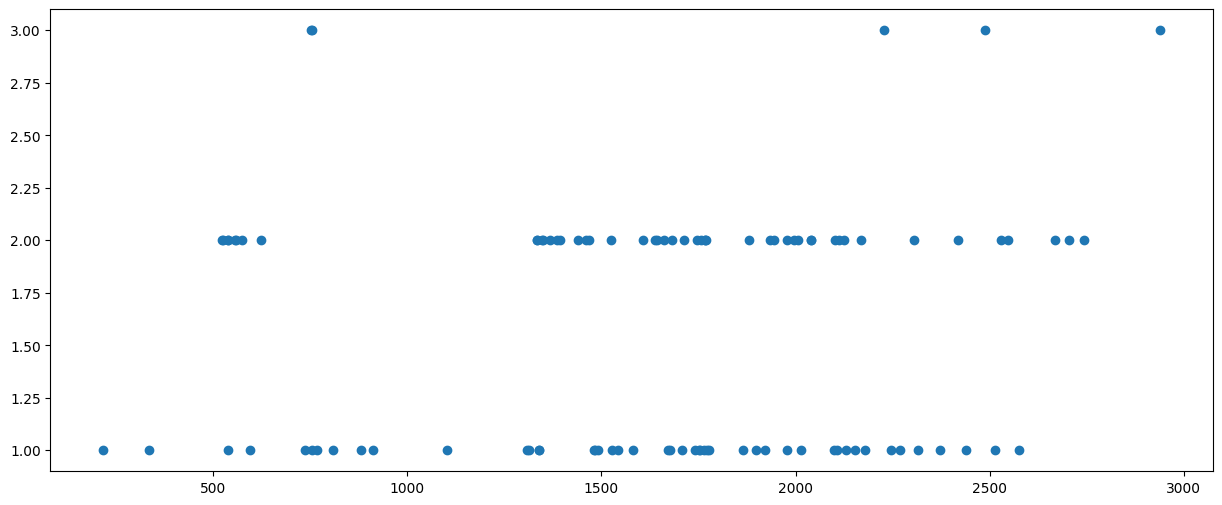

0      2229.0
1      1339.0
2      1393.0
3       881.0
4      1742.0
        ...  
96     1756.0
97     1525.0
98     2152.0
99     2006.0
100     525.0
Length: 101, dtype: float64


In [75]:
trainer_set3 = cl_data[:]


trainer_set3.drop(["DATE OCC"], axis=1, inplace=True)

print(trainer_set3.corr())



data_second_regression = pd.DataFrame({"Ages":trainer_set3["Vict Age"], "Part 1-2": trainer_set3["Part 1-2"], "Premis Cd": trainer_set3["Premis Cd"], "Genere": trainer_set3["Vict Sex"], "TIME OCC": trainer_set3["TIME OCC"] ,  "AREA": trainer_set2["AREA"],  "Vict Descent": trainer_set3["Vict Descent"]})

#count_by_age = data_second_regression.groupby(["Dates", "Ages"]).agg("count")
count_by_age = data_second_regression.groupby(["Ages"]).size()
print(count_by_age)
#print(count_by_age)
plt.figure(figsize=(15,6))
print(data_second_regression["Ages"][0:101])
plt.scatter( data_second_regression["Part 1-2"][0:101] + data_second_regression["Premis Cd"][0:101] + data_second_regression["Ages"][0:101] + data_second_regression["TIME OCC"][0:101] + data_second_regression["AREA"][0:101] + data_second_regression["Vict Descent"][0:101],  data_second_regression["Genere"][0:101], )
#plt.scatter(range(0, len(data_second_regression[0:101]) ), data_second_regression["Ages"][0:101])

plt.show()

data_to_work = data_second_regression["Part 1-2"][0:101] + data_second_regression["Premis Cd"][0:101] + data_second_regression["Ages"][0:101]  + data_second_regression["TIME OCC"][0:101] + data_second_regression["AREA"][0:101] + data_second_regression["Vict Descent"][0:101]
data_to_test = data_second_regression["Part 1-2"][100:151] + data_second_regression["Premis Cd"][100:151]  + data_second_regression["Ages"][100:151] + data_second_regression["TIME OCC"][100:151] + data_second_regression["AREA"][100:151] + data_second_regression["Vict Descent"][100:151]

print(data_to_work)

In [80]:

count_by_age_regression = pd.Series(data_to_work) 

x = count_by_age_regression.values.reshape(-1, 1)
sex_model = linear_model.LogisticRegression()

sex_model.fit(x, data_second_regression["Genere"][0:101])

LogisticRegression()

In [81]:
count_by_age_regression_test = pd.Series(data_to_test)

x_test2 = count_by_age_regression_test.values.reshape(-1, 1)

prediction_sex = sex_model.predict(x_test2)

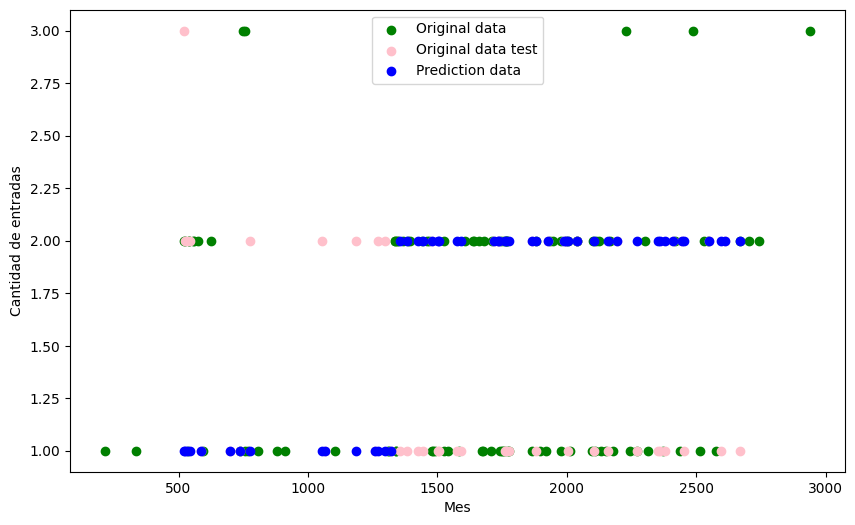

In [83]:
plt.figure(figsize=(10, 6))
plt.scatter(data_to_work, data_second_regression["Genere"][0:101], c= "g" , label = "Original data")
plt.scatter(data_to_test, data_second_regression["Genere"][100:151], c= "pink" , label = "Original data test")
plt.scatter(data_to_test, prediction_sex, c= "b", label = "Prediction data")
# plt.scatter(dates_test[0:2], count_by_date_test.values[0:2], c= "y", label = "Test data")
# plt.scatter(dates_test[0:2], predictions[0:2], c= "cyan", label = "Test data prediction")
plt.xlabel('Mes')
plt.ylabel('Cantidad de entradas')

plt.legend()
 
plt.show()

In [87]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
import numpy as np

accuracy = accuracy_score(data_second_regression["Genere"][100:151], prediction_sex)
print(f'Accuracy: {accuracy}')

recall = recall_score(data_second_regression["Genere"][100:151], prediction_sex, average='macro')
print(f'Recall (Sensitivity): {recall}')

f1 = f1_score(data_second_regression["Genere"][100:151], prediction_sex, average='macro')
print(f'F1 Score: {f1}')

Accuracy: 0.39215686274509803
Recall (Sensitivity): 0.28354978354978355
F1 Score: 0.25394279604383857
